In [26]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

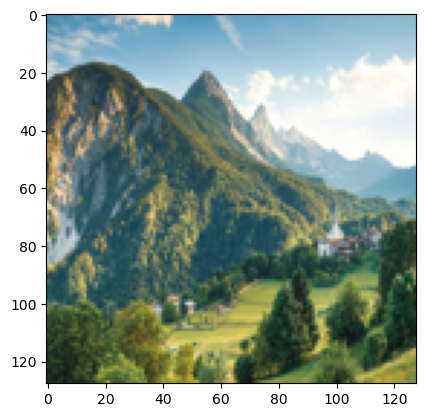

In [131]:
# fname = "orca.jpeg"
# fname = "unicorn.png"
fname = "mountain.jpg"
img = Image.open(fname).convert("RGB").resize((128,128))
img = np.array(img)
plt.imshow(img)
plt.show()

In [132]:
def img2tensor(img):
    return (img-127.5)/127.5

def tensor2img(x):
    img = (x*127.5) + 127.5
    return np.clip(img, 0, 255).astype(np.uint8)

def forward(x, beta):
    noise = np.random.normal(loc=0.0, scale=beta, size=img.shape)
    s = np.sqrt(1-beta)
    x = s * x + noise
    return x

def noise_image(img, n = 1000, beta = 0.008):

    x = img2tensor(img)
    xs = [x]
    imgs = [img]
    for _ in tqdm(range(n)):
        x = forward(x, beta)
        xs.append(x)
        imgs.append(tensor2img(x))

    return imgs, xs

100%|██████████| 1000/1000 [00:00<00:00, 1000.00it/s]


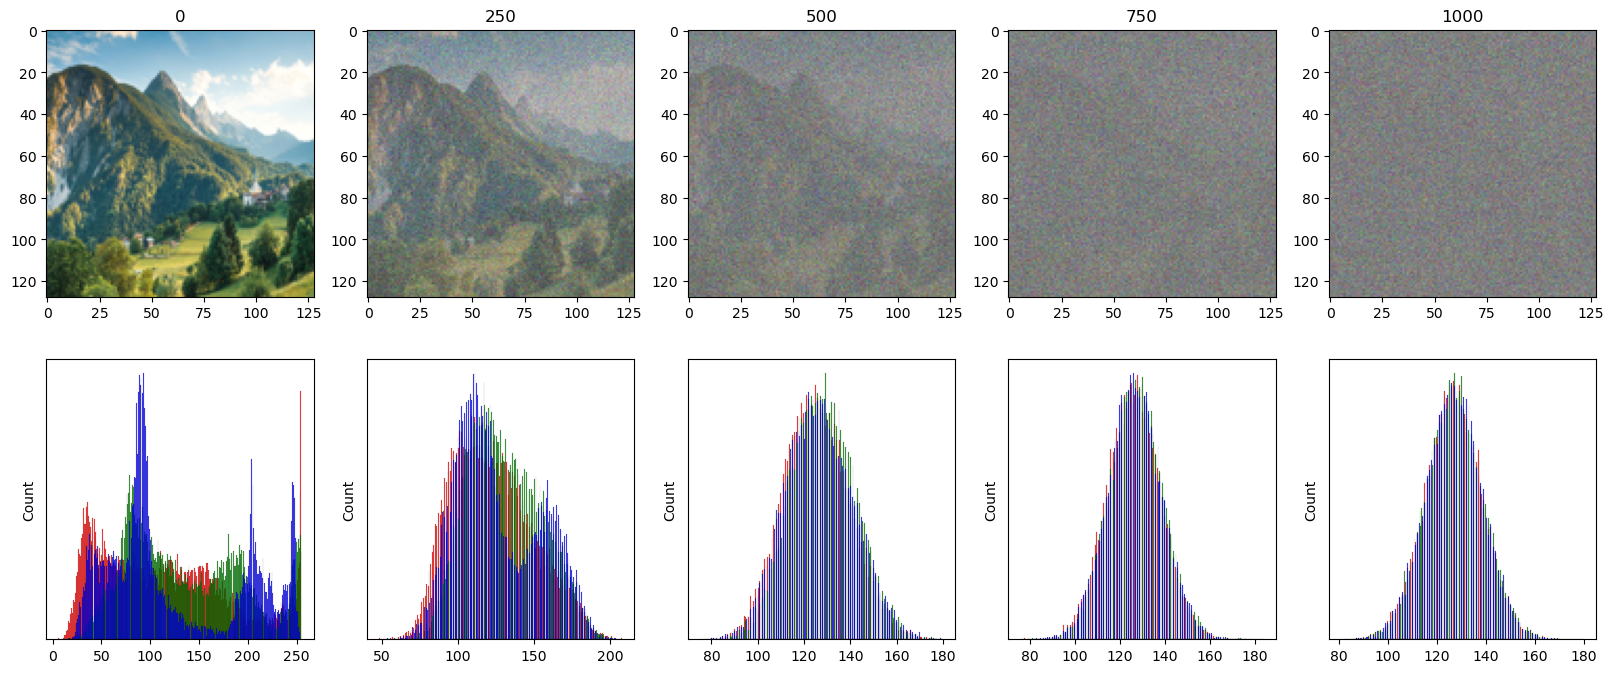

In [145]:

imgs, xs = noise_image(img, n = 1000, beta = 0.008)

steps = [0, 250, 500, 750, 1000]

fig, axs = plt.subplots(2, len(steps), figsize=(20, 8))
for j, i in enumerate(steps):

    axs[0, j].set_title(i)
    axs[0, j].imshow(imgs[i])

    for k, color in enumerate(["red", "green", "blue"]):    
        v = imgs[i][:,:,k].flatten()
        sns.histplot(v, ax=axs[1,j], bins=256, color=color)
    axs[1,j].set_yticks([])

In [150]:
beta = 0.008
n = 1000

def run_experiment(beta, n):
    
    fnames = ["orca.jpeg", "unicorn.png", "mountain.jpg"]

    fig, axs = plt.subplots(1,len(fnames), figsize=(20, 4), sharex=True)

    for i, fname in enumerate(fnames):

        img = Image.open(fname).convert("RGB").resize((128,128))
        img = np.array(img)

        imgs, xs = noise_image(img, n = n, beta = beta)

        mus = np.array([x.reshape(-1, 3).mean(axis=0) for x in xs])
        stds = np.array([x.reshape(-1, 3).std(axis=0) for x in xs])

        ax2 = axs[i].twinx()
        ax2.axhline(np.sqrt(beta), linestyle="--", color="black")
        
        for k, color in enumerate(["red", "green", "blue"]):    
            axs[i].plot(mus[:,k], color=color)
            ax2.plot(stds[:,k], color=color, ls=":")

        axs[i].set_ylim(-1, 1)
        ax2.set_ylim(0, 0.5)
        

    plt.show()

100%|██████████| 1000/1000 [00:00<00:00, 1123.87it/s]


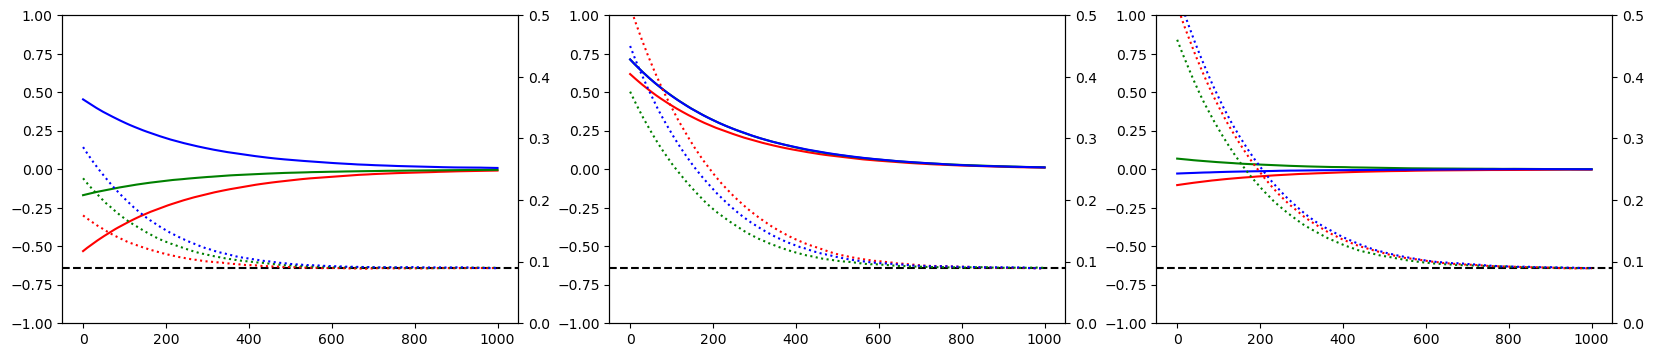

In [151]:
run_experiment(0.008, 1000)

100%|██████████| 1000/1000 [00:00<00:00, 1098.23it/s]


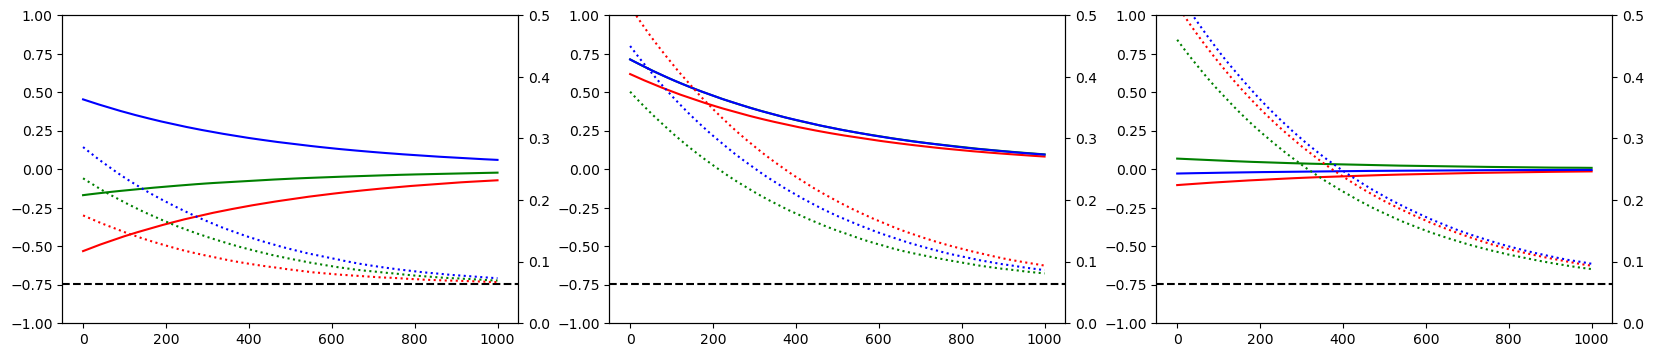

In [152]:
run_experiment(0.004, 1000)

100%|██████████| 5000/5000 [00:04<00:00, 1086.94it/s]


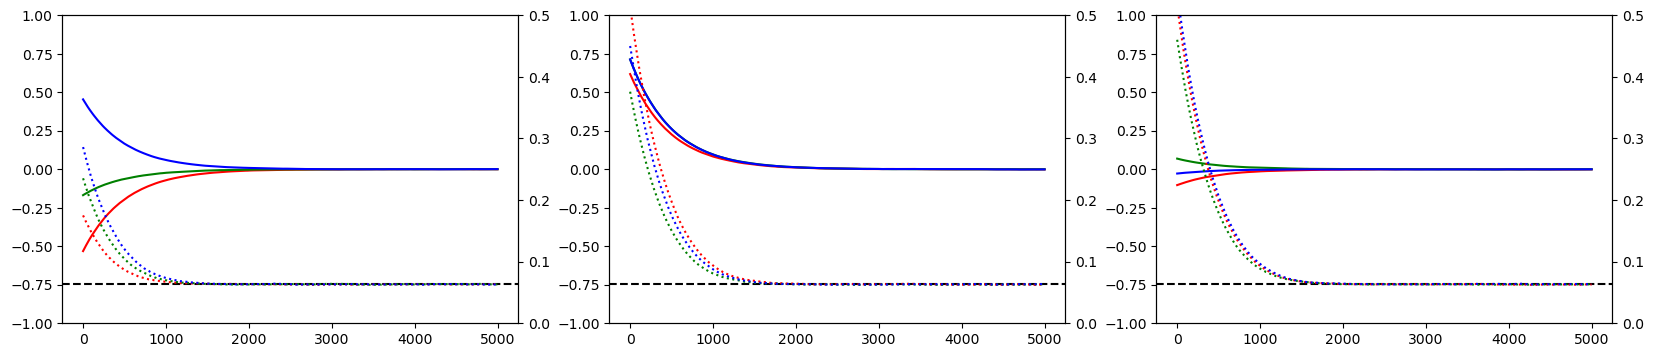

In [153]:
run_experiment(0.004, 5000)